In [71]:
import torch as tr
import numpy as np

import itertools

from PM_models import *
from PM_tasks import *
from help_amtask import *

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# train data

In [78]:
nmapsL = [3]
ntrL = [2]
wmL = [1,2]
deepL = [0,1]
stsizeL = [8,10,12]
instdimL = [8,10,12]
stimdimL = [8,10,12]

In [81]:
maxnsubs = 5
fdir = 'model_data/amtask-mini/'
D = {}
for nmaps,ntr,wmsetting,stsize,deep,instdim,stimdim in itertools.product(
    nmapsL,ntrL,wmL,stsizeL,deepL,instdimL,stimdimL):
  D[ntr,wmsetting,stsize,deep,instdim,stimdim] = []
  for seed in range(maxnsubs):
    fpath = 'nmaps_%i-ntrials_%i-lstm(%i)_%i-deep_%i-em_0-instdim_%i-stimdim_%i-seed_%i-trsc.npy'%(
                nmaps,ntr,wmsetting,stsize,deep,instdim,stimdim,seed)
    try:
      trsc = np.load(fdir+fpath)
      D[ntr,wmsetting,stsize,deep,instdim,stimdim].append(trsc)
    except:
      pass

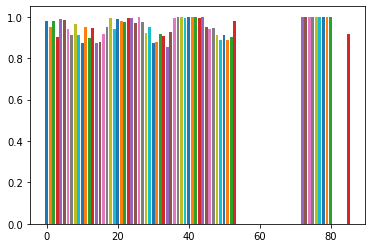

In [82]:
for idx,(group,trscL) in enumerate(D.items()):
  if not len(trscL): continue
  trsc = np.array(trscL)
  tracc = trsc.mean((2,3))
  plt.bar(idx,tracc[:,-1000:].mean())

# training

0.0 0.0
0.2 1.0
0.4 1.0
0.6 0.6666666666666666
0.8 0.8333333333333334
0.0 0.16666666666666666
0.2 0.8333333333333334
0.4 0.8333333333333334
0.6 1.0
0.8 1.0
0.0 0.5
0.2 0.8333333333333334
0.4 0.8333333333333334
0.6 0.6666666666666666
0.8 0.6666666666666666
0.0 0.0
0.2 1.0
0.4 1.0
0.6 0.8333333333333334
0.8 1.0
0.0 0.16666666666666666
0.2 1.0
0.4 1.0
0.6 0.8333333333333334
0.8 0.8333333333333334
0.0 0.6666666666666666
0.2 0.8333333333333334
0.4 0.8333333333333334
0.6 0.6666666666666666
0.8 0.6666666666666666
0.0 0.3333333333333333
0.2 0.8333333333333334
0.4 0.8333333333333334
0.6 0.6666666666666666
0.8 1.0
0.0 0.0
0.2 1.0
0.4 1.0
0.6 1.0
0.8 1.0
0.0 0.16666666666666666
0.2 1.0
0.4 1.0
0.6 1.0
0.8 0.8333333333333334
0.0 0.0
0.2 0.8333333333333334
0.4 0.8333333333333334
0.6 0.6666666666666666
0.8 0.6666666666666666
0.0 0.0
0.2 0.8333333333333334
0.4 0.8333333333333334
0.6 0.8333333333333334
0.8 0.6666666666666666
0.0 0.0
0.2 1.0
0.4 1.0
0.6 1.0
0.8 1.0


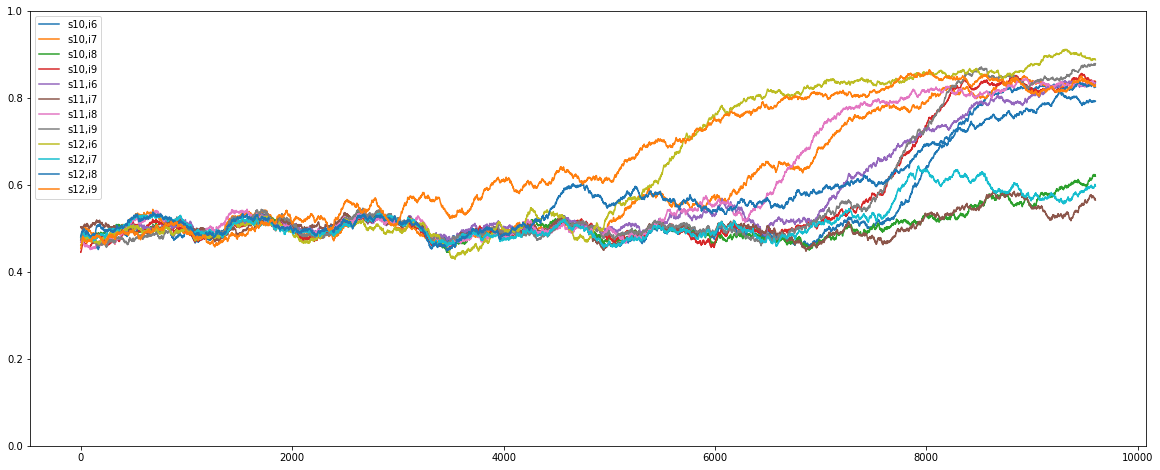

In [40]:
nmaps = 2
ntr,trlen=2,1
neps = 10000
wm,em = 1,0
seed = 0
indimL = [6,7,8,9]
stsizeL = [10,11,12]
plt.figure(figsize=(20,8))
for stsize,indim in itertools.product(stsizeL,indimL):
  net = NetAMEM(stsize,em,wm,seed,indim,indim)
  net.deep = False
  task = TaskArbitraryMaps(nmaps,seed=seed,stimdim=indim)
  trsc = run_net(net,task,neps,ntr,trlen,True)
  tracc = mov_avg(trsc[:,:,nmaps:].mean((1,2)),400)
  plt.plot(tracc,label='s%i,i%i'%(stsize,indim))
plt.ylim(0,1)
plt.legend()